In [38]:
import numpy as np
import matplotlib.pyplot as plt
from pyanom.structure_learning import GraphicalLasso

## Prepare data

In [39]:
X_normal = np.loadtxt("./data/normal_data.csv", delimiter=",")
X_error = np.loadtxt("./data/error_data.csv", delimiter=",")

print(X_normal.shape)
print(X_error.shape)

(100, 3)
(100, 3)


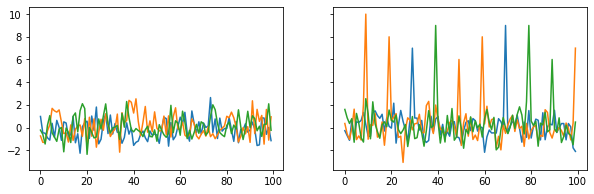

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True)

ax[0].plot(X_normal)
ax[1].plot(X_error)
plt.show()

## Training

In [41]:
model = GraphicalLasso(rho=0.1)
model.fit(X_normal)

GraphicalLasso(rho=0.1)

## Inference

In [42]:
anomaly_score = model.score(X_error)

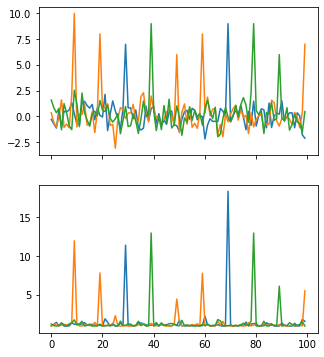

In [43]:
fig, ax = plt.subplots(2, 1, figsize=(5, 6), sharex=True)
ax[0].plot(X_error)
ax[1].plot(anomaly_score)
plt.show()

## Feature anomaly analysis

In [44]:
def prepare_data():
    x_1 = np.random.randn(100, )
    x_2 = 2.0 * x_1 - 1.0 + np.random.normal(0, 0.1, (100, ))
    x_3 = - 1.4 * x_1 + 0.3 + np.random.normal(0, 0.3, (100, ))

    # make anomaly
    x_3[50:] = 0.6 * x_1[50:] - 0.2 + np.random.normal(0, 0.2, (50, ))

    X = np.vstack([x_1, x_2, x_3]).T
    X_normal = X[:50].copy()
    X_error = X[50:].copy()
    return X_normal, X_error

In [45]:
X_normal, X_error = prepare_data()

print(X_normal.shape)
print(X_error.shape)

(50, 3)
(50, 3)


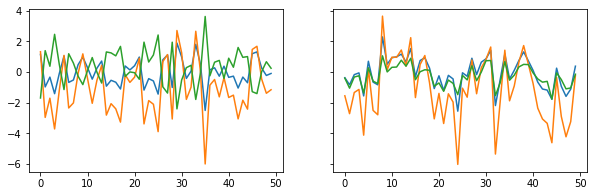

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True)

ax[0].plot(X_normal)
ax[1].plot(X_error)
plt.show()

In [47]:
model2 = GraphicalLasso(rho=0.1)
model2.fit(X_error)

GraphicalLasso(rho=0.1)

In [48]:
pmatrix1 = model.pmatrix_
cov1 = model.cov_
pmatrix2 = model2.pmatrix_
cov2 = model2.cov_

anomaly_score = GraphicalLasso.anomaly_analysis_score(pmatrix1, cov1, pmatrix2, cov2)
print(anomaly_score)

[1.74544339 1.61438509 0.89138884]
